# Data Science Dojo
<font size="4">Finding the Age of Abalones</font>

---

## Table of Contents

### [Problem Statement](#ProbState)

1. [**Imports (All imported libraries are added here)**](#imports)
2. [**Dataset**](#dataset)    
3. [**Data Cleaning**](#dc)
    1. [**Renaming Column Names**](#rename)
    2. [**Dummifying Genders**](#dummy)
    3. [**Age of Abalone**](#age)
4. [**EDA**](#eda)
    1. [**Correlations**](#corr)
    2. [**Scatter Plots against Rings**](#scatter)
    3. [**Box Plots against Rings**](#box)
5. [**Modelling**](#model)
6. [**Model Evaluation**](#evaluate)

---

<a id="ProbState"></a>
## Problem Statement

Abalone has been a delicacy, widely consumed by various cultures and people around the world. As such for the farmers of the shellfish, it is important to know of the age of the abalone as this will directly correspond to the actual sale price of the abalone.

Currently, the age-old method of determining the age of the abalone is by culling the abalone and then counting the actual number of rings on the abalone, since the number of rings on the shell will give the approximate age of the abalone, similar to the rings of a tree. In order to count the rings, the shell has to be cleaned and polished, and the rings identified under a microscope, which makes it difficult, impractical and expensive to use as a method of determining the sale price of the abalone.

In this project, our goal here is to see if there is an alternative and simpler method to determining the actual age of the abalone.

<a id="imports"></a>
## 1. Imports (All imported libraries are added here)

In [1]:
# import all libraries here 
import warnings
warnings.filterwarnings('ignore')

# General Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Modelling Modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression

from imblearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

<a id="dataset"></a>
## 2. Dataset

In [2]:
# import data
df = pd.read_csv('./abalone.data.csv')

In [3]:
# Define function to view basic information of dataframe
def df_look(df):
    print('Number of rows: ', df.shape[0])
    print('Number of columns: ', df.shape[1], '\n') 
    display(df.dtypes)
    print('\nMissing values in dataset:')
    display(df.isnull().sum())
    print('\nCount of duplicated rows in dataset: ', df[df.duplicated(keep=False)].shape[0], '\n')

<a id="dc"></a>
## 3. Data Cleaning

In [4]:
# Checking the basic info for the match dataset
df_look(df)

Number of rows:  4176
Number of columns:  9 



M          object
0.455     float64
0.365     float64
0.095     float64
0.514     float64
0.2245    float64
0.101     float64
0.15      float64
15          int64
dtype: object


Missing values in dataset:


M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64


Count of duplicated rows in dataset:  0 



In [5]:
# Looking at the first 5 rows
df.head()

M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8

<a id="rename"></a>
### 3.1 Renaming Column names

The first look at the dataframe shows that the columns names are not intuitive.

As such, the first course of action is to translate the column names into proper ones.

In [6]:
# Rename all of the columns
df.rename({'M': 'sex', '0.455': 'length', '0.365': 'diameter', '0.095': 'height', 
          '0.514': 'whole_weight', '0.2245': 'shucked_weight', '0.101': 'viscera_weight',
          '0.15': 'shell_weight', '15': 'rings'}, 
          axis = 1, inplace = True)

# Looking at the first 5 rows again
df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   shell_weight  rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3         0.055      7  
4         0.120      8

In [7]:
# Creating a separate dataframe for data manipulation
abalone = df.copy()

<a id="dummy"></a>
### 3.2 Dummifying Genders

Since the first column is an categorical column, it would be wise to dummify it for analysis and modelling.

In [8]:
# Looking at the value counts of the 'sex' column
abalone['sex'].value_counts()

M    1527
I    1342
F    1307
Name: sex, dtype: int64

In [9]:
# Dummify the 'sex' column
abalone = pd.get_dummies(abalone, columns = ['sex'])

# Checking the first 5 columns again
abalone.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.070      7      0      0      1  
1         0.210      9      1      0      0  
2         0.155     10      0      0      1  
3         0.055      7      0      1      0  
4         0.120      8      0      1      0

<a id="age"></a>
### 3.3 Age of Abalone

It can be seen from above that the target variable of 'age' cannot be found anyway in the data.

However, from the data dictionary, we find that the age of the abalone can be derived from the number of rings it has. As such, we can model our data based on the target variable of 'rings'.

> Age = Rings + 1.5

<a id="eda"></a>
## 4. EDA

In [10]:
# A quick describe of the dataframe
abalone.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4176.000000  4176.000000  4176.000000   4176.000000      4176.00000   
mean      0.524009     0.407892     0.139527      0.828818         0.35940   
std       0.120103     0.099250     0.041826      0.490424         0.22198   
min       0.075000     0.055000     0.000000      0.002000         0.00100   
25%       0.450000     0.350000     0.115000      0.441500         0.18600   
50%       0.545000     0.425000     0.140000      0.799750         0.33600   
75%       0.615000     0.480000     0.165000      1.153250         0.50200   
max       0.815000     0.650000     1.130000      2.825500         1.48800   

       viscera_weight  shell_weight        rings        sex_F        sex_I  \
count     4176.000000   4176.000000  4176.000000  4176.000000  4176.000000   
mean         0.180613      0.238852     9.932471     0.312979     0.321360   
std          0.109620      0.139213     3.223601     0.463761     0.467055   
min          0.000500      0.001500     1.000000     0.000000     0.000000   
25%          0.093375      0.130000     8.000000     0.000000     0.000000   
50%          0.171000      0.234000     9.000000     0.000000     0.000000   
75%          0.253000      0.329000    11.000000     1.000000     1.000000   
max          0.760000      1.005000    29.000000     1.000000     1.000000   

             sex_M  
count  4176.000000  
mean      0.365661  
std       0.481673  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

<a id="corr"></a>
### 4.1 Correlations

In [11]:
# function for getting the heatmap for correlation
def corr_heatmap(dataframe):
    # Create mask to hide the upper triangle of correlation matrix
    mask = np.zeros_like(dataframe)
    mask[np.triu_indices_from(mask)] = True

    # Plot correlation matrix of player_stats dataframe
    plt.figure(figsize=(12,8))
    sns.heatmap(dataframe, cmap='coolwarm', annot=True, mask=mask);

In [12]:
# defining the correlation dataframe
df_corr = abalone.corr()
df_corr

length  diameter    height  whole_weight  shucked_weight  \
length          1.000000  0.986813  0.827552      0.925255        0.897905   
diameter        0.986813  1.000000  0.833705      0.925452        0.893159   
height          0.827552  0.833705  1.000000      0.819209        0.774957   
whole_weight    0.925255  0.925452  0.819209      1.000000        0.969403   
shucked_weight  0.897905  0.893159  0.774957      0.969403        1.000000   
viscera_weight  0.903010  0.899726  0.798293      0.966372        0.931956   
shell_weight    0.897697  0.905328  0.817326      0.955351        0.882606   
rings           0.557123  0.575005  0.558109      0.540818        0.421256   
sex_F           0.309602  0.318581  0.298306      0.299668        0.263919   
sex_I          -0.551613 -0.564431 -0.518828     -0.557757       -0.521995   
sex_M           0.236783  0.240567  0.215869      0.252305        0.252048   

                viscera_weight  shell_weight     rings     sex_F     sex_I  \
length                0.903010      0.897697  0.557123  0.309602 -0.551613   
diameter              0.899726      0.905328  0.575005  0.318581 -0.564431   
height                0.798293      0.817326  0.558109  0.298306 -0.518828   
whole_weight          0.966372      0.955351  0.540818  0.299668 -0.557757   
shucked_weight        0.931956      0.882606  0.421256  0.263919 -0.521995   
viscera_weight        1.000000      0.907647  0.504274  0.308363 -0.556267   
shell_weight          0.907647      1.000000  0.628031  0.306248 -0.547116   
rings                 0.504274      0.628031  1.000000  0.250620 -0.435958   
sex_F                 0.308363      0.306248  0.250620  1.000000 -0.464461   
sex_I                -0.556267     -0.547116 -0.435958 -0.464461  1.000000   
sex_M                 0.242489      0.235652  0.181426 -0.512449 -0.522462   

                   sex_M  
length          0.236783  
diameter        0.240567  
height          0.215869  
whole_weight    0.252305  
shucked_weight  0.252048  
viscera_weight  0.242489  
shell_weight    0.235652  
rings           0.181426  
sex_F          -0.512449  
sex_I          -0.522462  
sex_M           1.000000

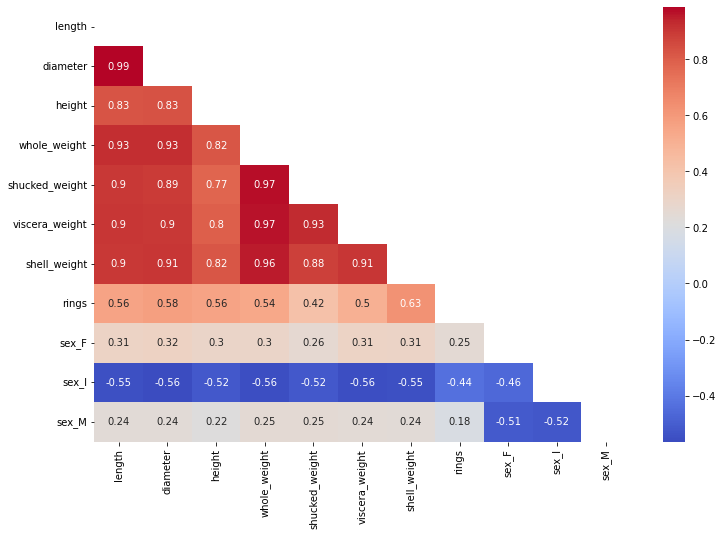

In [13]:
# Looking at the heatmap
corr_heatmap(df_corr)

From the above, we can easily see that the physical dimensions are all correlated with one another, which is not that surprising considering that the larger an abalone, the higher the length/diameter/height and the heavier its weights are. As such, it may be prudent to reduce the number of variables relating to the physical dimensions to reduce collinearity.

Also, with respect to the number of rings, there is no clear correlation with the other variables, other than the sex being infant being negatively correlated.

<a id="scatter"></a>
### 4.2 Scatter Plots against Rings

In [14]:
# Function for Scatter Plot for feature vs rings 
def scatter_feat_rings(feat):
    plt.figure(figsize = [12, 6])                                                      
    plt.title(f'{feat} vs Rings', fontsize = 12)                                  
    sns.regplot(x = feat, y = 'rings', data = abalone, line_kws = {"color": "red"})

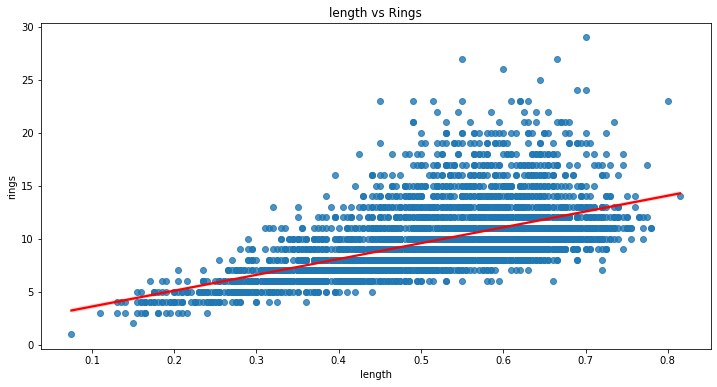

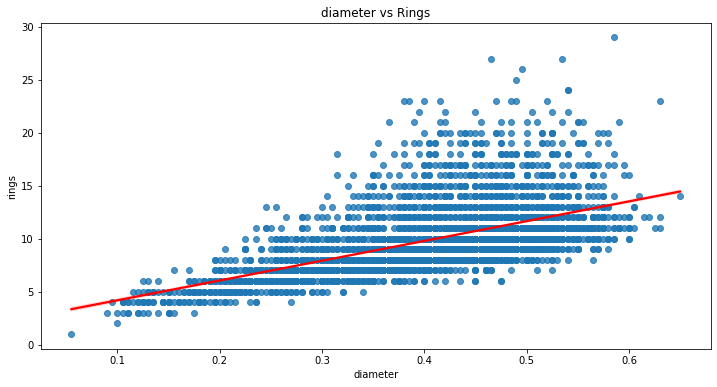

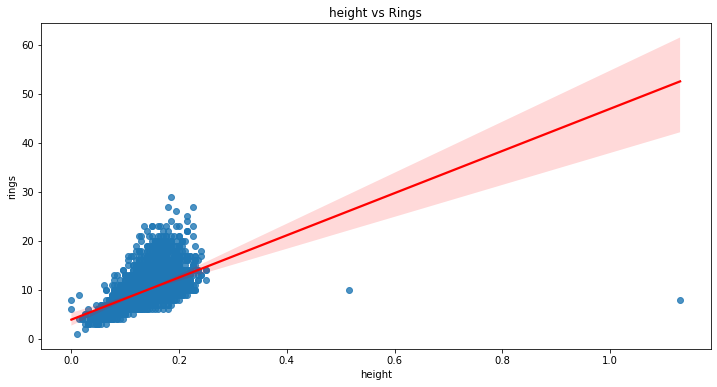

In [15]:
# Scatter Plots of Length, Diameter, Height against Rings
scatter_feat_rings('length')
scatter_feat_rings('diameter')
scatter_feat_rings('height')

Looking at the distributions, we can see that three variables are somewhat similar since `length`, `diameter` and `height` covers the dimensions of the abalone.

However, it would seem that there are two obvious outliers in the distribution for `height`, which we will be to remove.

In [16]:
# Displaying the outliers
display(abalone.loc[abalone['height'] > 0.5]) 

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
1416   0.705     0.565   0.515         2.210          1.1075          0.4865   
2050   0.455     0.355   1.130         0.594          0.3320          0.1160   

      shell_weight  rings  sex_F  sex_I  sex_M  
1416        0.5120     10      0      0      1  
2050        0.1335      8      1      0      0

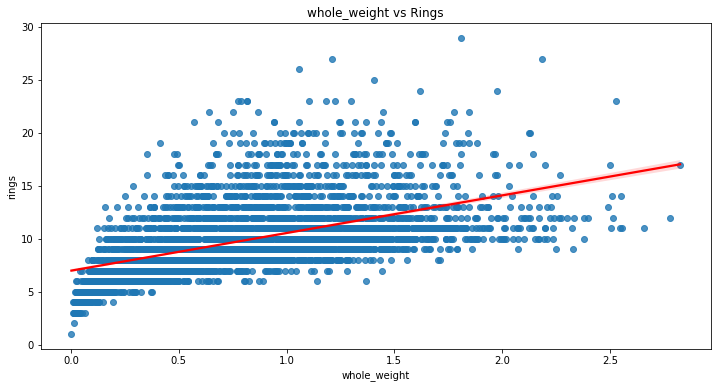

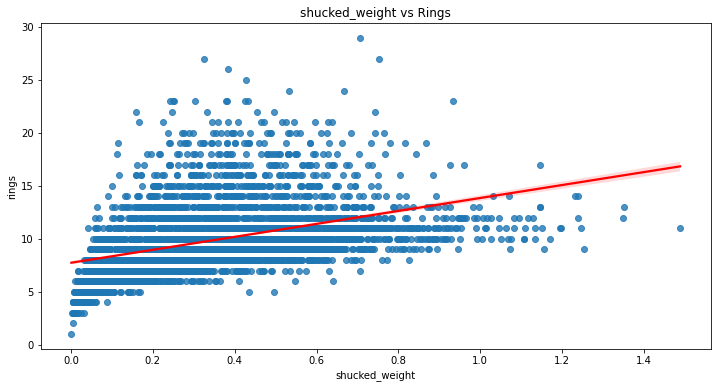

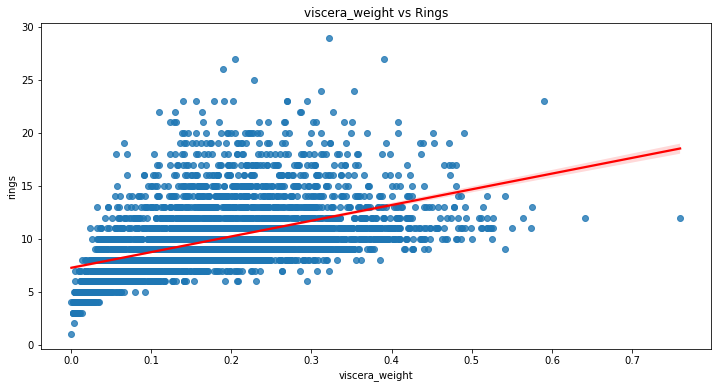

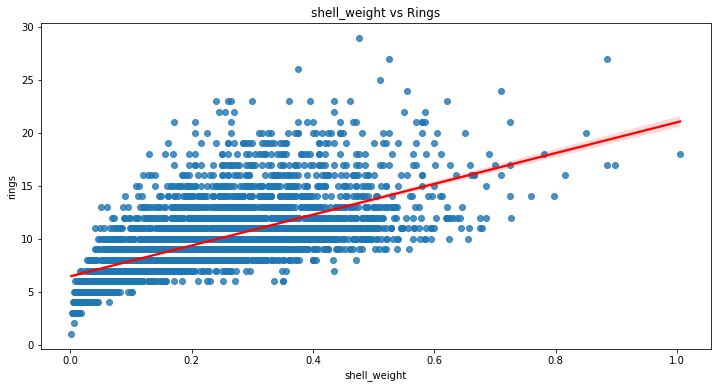

In [17]:
# Scatter Plots of Weights against Rings
scatter_feat_rings('whole_weight')
scatter_feat_rings('shucked_weight')
scatter_feat_rings('viscera_weight')
scatter_feat_rings('shell_weight')

Looking at the distributions, we can see that the four variables are somewhat similar, which is to be expected as they are correlated with each other. 

<a id="box"></a>
### 4.3 Box Plots against Rings

In [18]:
# Function for Box Plot for feature vs Rings 
def box_feat_rings(feat, dataframe = abalone):
    plt.figure(figsize = [16, 9])                                
    plt.title(f'{feat} vs Rings', fontsize = 12)                                          
    sns.boxplot(x=feat, y = 'rings', data = dataframe);       

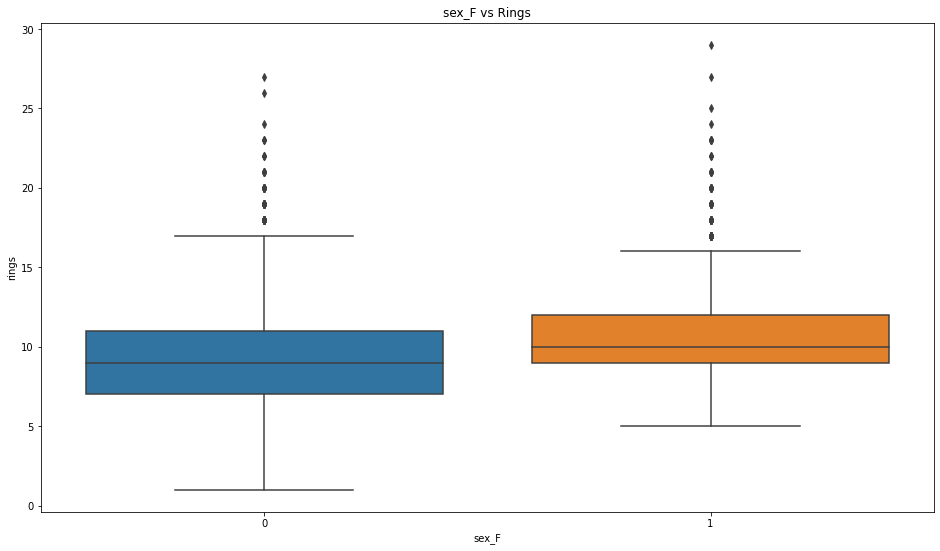

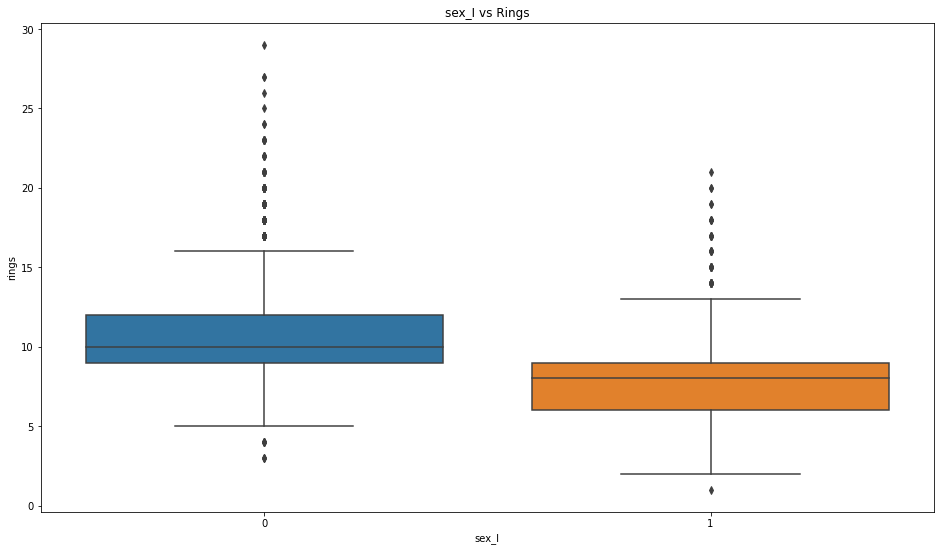

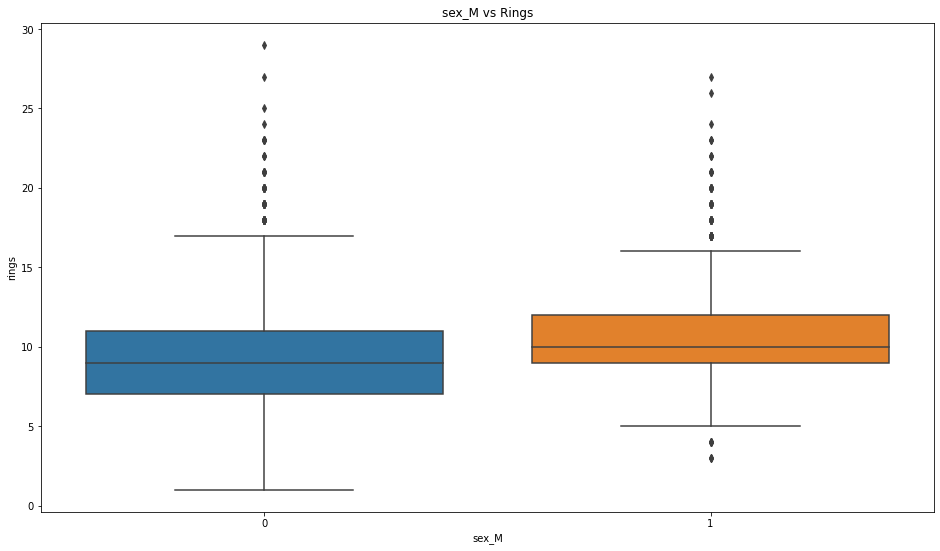

In [19]:
# Box Plots of Gender against Rings
box_feat_rings('sex_F')
box_feat_rings('sex_I')
box_feat_rings('sex_M')

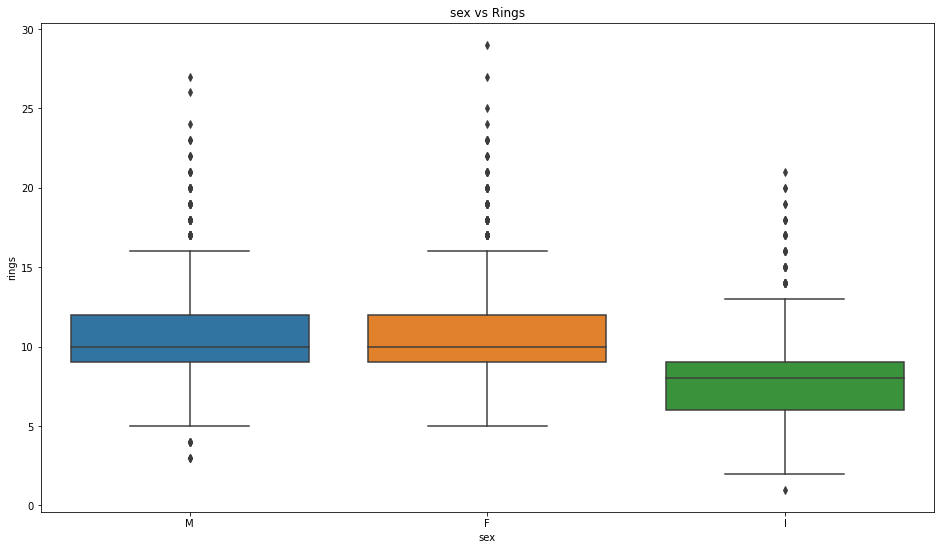

In [20]:
# Box plots of the genders together in one plot
box_feat_rings('sex', dataframe = df)

From the above, we can easily see that the gender of abalones are affected by the age where infant abalones tend to be younger in age, as shown by the correlation.

<a id="model"></a>
## 5. Modelling

<a id="traintest"></a>
### 5.1 Train/Test Split
If we are to evaluate our models, we will have to split up the training dataset into train data and test data.

In [21]:
# Creating the X and y variables from the training dataset
X = abalone.drop(columns = ['rings'])
y = abalone['rings']

# Displaying the shapes of the X and y variables
display(X.shape)
display(y.shape)

(4176, 10)

(4176,)

In [22]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [23]:
# columns to be scaled, only dummy cols need not be scaled
scale_cols = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']

In [24]:
# Create dataframes Xss_train and Xss_test which will eventually have its discrete and continuous columns standardised
Xss_train = X_train.copy()
Xss_test = X_test.copy()

# Standardisation
ss = StandardScaler()
Xss_train[scale_cols] = ss.fit_transform(X_train[scale_cols])
Xss_test[scale_cols] = ss.transform(X_test[scale_cols])

In [25]:
Xss_train

length  diameter    height  whole_weight  shucked_weight  \
2428 -1.546422 -1.556170 -1.053558     -1.258947       -1.260633   
3823  0.795725  0.521917  0.706869      0.605245        0.789463   
3956  0.252013  0.319177  0.354783      0.378850        0.602065   
3623  1.172142  0.927397  0.824231      1.234461        1.277152   
0    -1.462774 -1.454800 -1.170920     -1.233452       -1.177094   
...        ...       ...       ...           ...             ...   
3444 -0.249876 -0.086304  0.120060     -0.514494       -0.477171   
466   1.088494  1.231507  1.293678      1.137580        0.933964   
3092 -0.040756  0.217806  0.237422     -0.208554       -0.262679   
3772  0.419309  0.521917  0.237422      0.197326       -0.122694   
860   0.586605  0.572602  0.002698      0.576691        0.710440   

      viscera_weight  shell_weight  sex_F  sex_I  sex_M  
2428       -1.337852     -1.212341      0      0      1  
3823        0.749584      0.409117      0      0      1  
3956        0.040129      0.172355      1      0      0  
3623        1.490874      0.940037      1      0      0  
0          -1.205966     -1.212341      0      0      1  
...              ...           ...    ...    ...    ...  
3444       -0.460128     -0.534342      0      1      0  
466         0.840540      1.227020      0      0      1  
3092       -0.214548     -0.028533      1      0      0  
3772        0.235684      0.427053      1      0      0  
860         0.572220      0.473688      1      0      0  

[3132 rows x 10 columns]

<a id="modelfuncs"></a>
### 5.2 Model Fitting and Evaluation Functions
At this point in time, we will be fitting the given data to a multi-variable linear regression model.

Also, to evaluate the models, we will be looking at the three metrics: _Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Coefficient of Determination, $R^2$_.

In [26]:
# Function to run GridSearchCV and print evaluation metrics and confusion matrix
def model_gridsearch(pipe, pipe_params): # pipe and pipe parameters as arguments
    model = GridSearchCV(pipe, pipe_params, cv = 5, scoring='r2', n_jobs = 1, verbose = 1)
    # Start timer
    t0 = time.time()

    # Fit the model using GridSearchCV
    model.fit(Xss_train, y_train)

    # Display time taken
    time_gs = time.time() - t0
    print(f"Time taken: {time_gs:.2f} seconds")
    
    # Display the best parameters
    print("\nBest Parameters: ", model.best_params_)

    return model

In [27]:
# Function for metrics (Since we will be using this often)
def evaluation(model, modeltype):
    # GridSearchCV best score
    grid = round(model.best_score_, 4)
    
    # Predicting the y values based on the given model
    pred = model.predict(Xss_test)      
    
    # Calculate train score
    trainscore = round(model.score(Xss_train, y_train), 4)
    
    # Calculate test score
    testscore = round(model.score(Xss_test, y_test), 4)
    
    # Printing the metrics data
    RMSE = round(np.sqrt(mean_squared_error(y_test, pred)), 4)
    MAE = round(mean_absolute_error(y_test, pred), 4)
    R2 = round(r2_score(y_test, pred), 4)
    
    # Create a dictionary containing model, vectorisation, scores and evaluation metrics
    dict = {'model': modeltype,
            'GridSearch_score': grid,
            'train_score': trainscore,
            'test_score': testscore,
            'test_RMSE': RMSE,
            'test_MAE': MAE,
            'test_R2': R2
           }
    display(pd.DataFrame([dict])) 
    
    return dict

In [28]:
# Function for the plot of predicted values versus actual values
def model_plot(model):
    # Predicting the y values based on the given model
    pred = model.predict(Xss_test) 
    
    plt.figure(figsize = [12, 6])                                                  
    plt.title('Actual Rings versus Predicted Rings', fontsize = 12)                
    plt.xlabel('Actual Rings')
    plt.ylabel('Predicted Rings')
    sns.regplot(x = y_test, y = pred, line_kws = {"color": "red"})             

<a id="baseline"></a>
### 5.3 Baseline Model
For the Baseline Model for the prediction of the `rings`, we will be using the mean value of `rings` from the train data above as the predictions for the test data.

In [29]:
# Set up Pipeline for Dummy Regressor as Baseline Model
pipe_dr = Pipeline([
    ('dr', DummyRegressor()) 
])

# Set up parameters for pipeline
pipe_dr_params = {
    'dr__strategy': ['mean']
}

# Run gridsearch
model_dr = model_gridsearch(pipe_dr, pipe_dr_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time taken: 0.01 seconds

Best Parameters:  {'dr__strategy': 'mean'}


In [30]:
# Evaluate the model
dict_dr = evaluation(model_dr, 'Baseline')

model  GridSearch_score  train_score  test_score  test_RMSE  test_MAE  \
0  Baseline           -0.0021          0.0     -0.0003     3.4165    2.4594   

   test_R2  
0  -0.0003

<a id="logreg"></a>
### 5.4 Logistics Regression

In [31]:
# Set up Pipeline for Logistic Regression
pipe_lr = Pipeline([ 
    ('lr', LogisticRegression(solver = 'saga', random_state = 42)) 
])

# Set up parameters for pipeline
pipe_lr_params = {
    'lr__penalty': ['l1', 'l2', 'elasticnet'], # Consider ridge, lasso and elasticnet regularization
    'lr__C': [300, 500, 700] # Vary regularization strength
}

# Run gridsearch
model_lr = model_gridsearch(pipe_lr, pipe_lr_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Time taken: 14.52 seconds

Best Parameters:  {'lr__C': 300, 'lr__penalty': 'l1'}


In [32]:
# Evaluate the model
dict_lr = evaluation(model_lr, 'LogReg')

model  GridSearch_score  train_score  test_score  test_RMSE  test_MAE  \
0  LogReg            0.3817       0.3853      0.3919     2.6638    1.6877   

   test_R2  
0   0.3919

<a id="knn"></a>
### 5.5 K Neighbors Regression (KNN)

In [33]:
# Set up Pipeline for KNeighborsRegressor (KNN)
pipe_knn = Pipeline([
    ('knn', KNeighborsRegressor())
])

# Set up parameters for pipeline
pipe_knn_params = {
    'knn__p': [1, 2], # Test euclidean distance vs manhattan distance between datapoints
    'knn__weights': ['uniform', 'distance'], # Assign equal weightage to all datapoints vs "nearer"
                                             # neighbours having greater influence
    'knn__n_neighbors': range(1, 9, 2) # Vary number of neighbours, odd numbers only
}

# Run gridsearch
model_knn = model_gridsearch(pipe_knn, pipe_knn_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Time taken: 1.04 seconds

Best Parameters:  {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}


In [34]:
# Evaluate the model
dict_knn = evaluation(model_knn, 'KNN')

model  GridSearch_score  train_score  test_score  test_RMSE  test_MAE  \
0   KNN            0.4893          1.0       0.515      2.379    1.6128   

   test_R2  
0    0.515

<a id="dt"></a>
### 5.6 Decision Tree Regression (DT)

In [48]:
# Set up Pipeline for DecisionTreeRegressor (DT)
pipe_dt = Pipeline([
    ('dt', DecisionTreeRegressor(random_state=42))
])

# Set up parameters for pipeline
pipe_dt_params = {
    'dt__max_depth': [2, 5, 10],  # Maximum depth of the tree
    'dt__min_samples_leaf': [5, 10, 15], # Minimum number of samples required to be at a leaf node
    'dt__max_features': [None, 'auto'], # Set max features
}

# Run gridsearch
model_dt = model_gridsearch(pipe_dt, pipe_dt_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Time taken: 0.62 seconds

Best Parameters:  {'dt__max_depth': 5, 'dt__max_features': None, 'dt__min_samples_leaf': 15}


In [49]:
# Evaluate the model
dict_dt = evaluation(model_dt, 'DT')

model  GridSearch_score  train_score  test_score  test_RMSE  test_MAE  \
0    DT            0.4704       0.5432      0.5123     2.3857    1.6289   

   test_R2  
0   0.5123

<a id="evaluate"></a>
## 6. Model Evaluation

In [37]:
# Create dataFrame containing evaluation metrics of models
print(f"Evaluation Metrics of Various Model Types:")
display(pd.DataFrame([dict_dr, dict_lr, dict_knn, dict_dt]))

Evaluation Metrics of Various Model Types:


model  GridSearch_score  train_score  test_score  test_RMSE  test_MAE  \
0  Baseline           -0.0021       0.0000     -0.0003     3.4165    2.4594   
1    LogReg            0.3817       0.3853      0.3919     2.6638    1.6877   
2       KNN            0.4893       1.0000      0.5150     2.3790    1.6128   
3        DT            0.4704       0.5432      0.5123     2.3857    1.6289   

   test_R2  
0  -0.0003  
1   0.3919  
2   0.5150  
3   0.5123

In [63]:
def final_evaluation(model, modeltype):
    # Fitting the final model
    model.fit(Z, y)

    # Predicting the y values based on the given model
    pred = model.predict(Z)      
    
    # Calculate train score
    trainscore = round(model.score(Z, y), 4)
    
    # Printing the metrics data
    RMSE = round(np.sqrt(mean_squared_error(y, pred)), 4)
    MAE = round(mean_absolute_error(y, pred), 4)
    R2 = round(r2_score(y, pred), 4)
    
    # Create a dictionary containing model, vectorisation, scores and evaluation metrics
    dict = {'model': modeltype,
            'train_score': trainscore,
            'test_score': '-',
            'test_RMSE': RMSE,
            'test_MAE': MAE,
            'test_R2': R2
           }
    display(pd.DataFrame([dict])) 
    
    return dict

In [53]:
# Best Model based on Decision Tree
dt_final = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=15, max_features=None)

# Initiating the Scaled dataset and scaling
Z = X.copy()
ss = StandardScaler()
Z[scale_cols] = ss.fit_transform(Z[scale_cols])

DecisionTreeRegressor(max_depth=5, min_samples_leaf=15, random_state=42)

In [64]:
dict_final = final_evaluation(dt_final, 'DT Final')

model  train_score test_score  test_RMSE  test_MAE  test_R2
0  DT Final       0.5447          -     2.1749    1.5404   0.5447

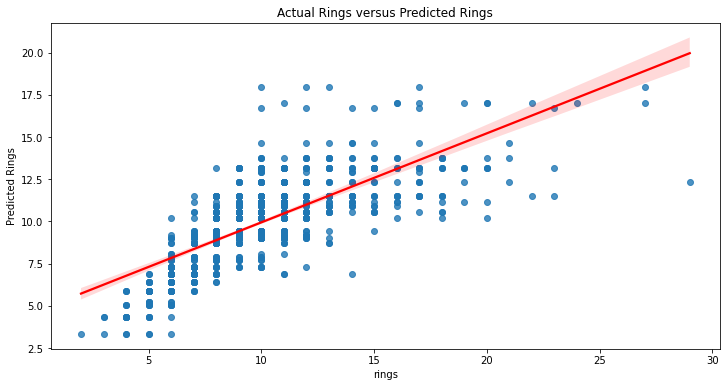

In [65]:
# Plot of the Actual Rings vs Predicted Rings on the DecisionTree Model
model_plot(dt_final)

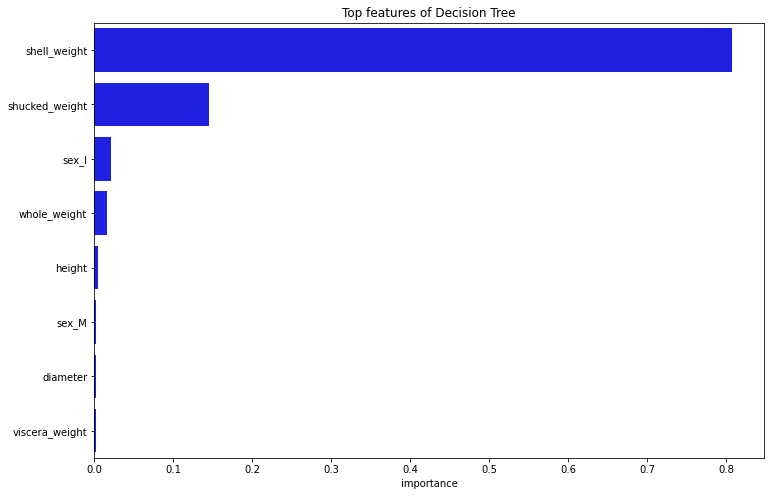

In [68]:
# Feature importances for Decision Tree
importance = pd.DataFrame(dt_final.feature_importances_,
                          index=Z.columns).sort_values(by=0, ascending=False)
importance = importance[importance > 0].dropna().rename(columns={0: 'importance'})

# plot the important features
plt.figure(figsize=(12, 8))
plt.title(f"Top features of Decision Tree", fontsize = 12)
sns.barplot(data=importance, x='importance', y=importance.index, color = 'blue');